### <center>San Jose State University<br>Department of Applied Data Science</center>
##  <center>DATA 245 Sec 21<br>Machine Learning Technologies 

                                                      I.   Data Understanding
                                                      II.  Data Preparation
                                                      III. Modeling

In [1]:
# Increasing the width of the screen
from IPython.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
# importing the required libraries
import pandas as pd
import glob
from pandas.plotting import scatter_matrix
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re 
import os
import datetime

## I. Data Understanding

### Collect and Store Dataset

- The synthetic data for credit card transactions for 1,000 customers is created using the Sparkov_Data_Generation-master.
- All the transactions are created for the duration January 1, 2020 to December 31, 2021.
- The generator creates a csv file for each customer will all transactions for the given customer.
- We will take the union of all the transactions in these csv files and load in the dataframe for our analysis. 

In [3]:
# Get CSV files list from a folder
path = 'C:/Users/Revathi/Documents/SJSU Course/Data245/Project/Sparkov_Data_Generation-master/Sparkov_Data_Generation-master/data/training set/medium'

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
df_list = (pd.read_csv(file, sep='|') for file in csv_files) # This creates a list of dataframes

In [4]:
# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

In [5]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,5c15602a5cf809764ed5d149a78e279a,2021-04-29,00:07:35,1.619680e+09,gas_transport,6.73,1.0,"fraud_Jenkins, Hauck and Friesen",44.084527,-67.954129
1,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,549fffa7671e25c7a183f2952ccff999,2021-04-29,07:10:46,1.619705e+09,gas_transport,12.74,1.0,"fraud_Zieme, Bode and Dooley",45.584705,-67.692301
2,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,844caa31863ba1973a63df3666c47f30,2021-04-29,10:09:12,1.619716e+09,gas_transport,9.53,1.0,fraud_Kling Inc,45.380492,-67.385962
3,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,a7f727e5cb108c1c9da38c5fccea95d7,2021-04-29,09:15:39,1.619713e+09,grocery_pos,10.95,1.0,fraud_Miller-Hauck,45.350439,-67.644179
4,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,e7594588105594902276aa61b9b0c919,2021-04-29,00:22:42,1.619681e+09,grocery_pos,353.18,1.0,fraud_McDermott-Weimann,45.424536,-67.852445


### Volume of Data

In [6]:
# To print the number of rows and columns in the dataset
df.shape

(1752721, 26)

### Type of Data

In [7]:
# Converting the datatype of the data loaded in the dataframe
# df = df.convert_dtypes()|

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752721 entries, 0 to 1752720
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         object 
 9   lat         float64
 10  long        float64
 11  city_pop    object 
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  profile     object 
 16  trans_num   object 
 17  trans_date  object 
 18  trans_time  object 
 19  unix_time   float64
 20  category    object 
 21  amt         float64
 22  is_fraud    float64
 23  merchant    object 
 24  merch_lat   float64
 25  merch_long  float64
dtypes: float64(7), object(19)
memory usage: 347.7+ MB


In [9]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

ssn: False
cc_num: False
first: False
last: False
gender: False
street: False
city: False
state: False
zip: False
lat: False
long: False
city_pop: False
job: False
dob: False
acct_num: False
profile: False
trans_num: True
trans_date: True
trans_time: True
unix_time: True
category: True
amt: True
is_fraud: True
merchant: True
merch_lat: True
merch_long: True


- We see that there are multiple columns with missing values in the dataset. We will handle these in the data preparation stage

In [10]:
# Printing the descriptive statistics for the dataset
df.describe()

,lat,long,unix_time,amt,is_fraud,merch_lat,merch_long
count,1.752721e+06,1.752721e+06,1.751721e+06,1.751721e+06,1.751721e+06,1.751721e+06,1.751721e+06
mean,3.755229e+01,-9.171316e+01,1.611112e+09,7.051059e+01,5.314773e-03,3.755235e+01,-9.171333e+01
std,5.158298e+00,1.640430e+01,1.822508e+07,1.666364e+02,7.270852e-02,5.190740e+00,1.641442e+01
min,2.132950e+01,-1.593448e+02,1.577866e+09,1.000000e+00,0.000000e+00,2.032995e+01,-1.603443e+02
25%,3.387960e+01,-9.862490e+01,1.595429e+09,9.020000e+00,0.000000e+00,3.383905e+01,-9.865916e+01
50%,3.861910e+01,-8.662130e+01,1.609552e+09,4.385000e+01,0.000000e+00,3.848595e+01,-8.652043e+01
75%,4.150220e+01,-7.953990e+01,1.627089e+09,8.126000e+01,0.000000e+00,4.150950e+01,-7.944400e+01
max,6.115350e+01,-6.775340e+01,1.641024e+09,2.205483e+04,1.000000e+00,6.215252e+01,-6.675340e+01


In [11]:
# Printing the target feature distribution in the dataset
df.is_fraud.value_counts()

0.0    1742411
1.0       9310
Name: is_fraud, dtype: int64

- We see that there are 9,310 instances of fraudulent transactions

In [12]:
# 1. Getting the area( urban/rural) from profile
df['area'] = df['profile'].str[-10 : -5]
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,area
0,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,2021-04-29,00:07:35,1.619680e+09,gas_transport,6.73,1.0,"fraud_Jenkins, Hauck and Friesen",44.084527,-67.954129,rural
1,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,2021-04-29,07:10:46,1.619705e+09,gas_transport,12.74,1.0,"fraud_Zieme, Bode and Dooley",45.584705,-67.692301,rural
2,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,2021-04-29,10:09:12,1.619716e+09,gas_transport,9.53,1.0,fraud_Kling Inc,45.380492,-67.385962,rural
3,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,2021-04-29,09:15:39,1.619713e+09,grocery_pos,10.95,1.0,fraud_Miller-Hauck,45.350439,-67.644179,rural
4,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,2021-04-29,00:22:42,1.619681e+09,grocery_pos,353.18,1.0,fraud_McDermott-Weimann,45.424536,-67.852445,rural


In [13]:
# 2. Creating a new column with age calculated from the dob
now = datetime.datetime.now()
df['age'] = df.dob.apply(lambda x: now.year - datetime.datetime.strptime(x,'%Y-%m-%d').year )

In [14]:
# 3. Calculating distance between customer location and merchant location
# pip install haversine
lon1 = df["long"].astype(float)
lat1 = df["lat"].astype(float)
lon2 = df["merch_long"].astype(float)
lat2 = df["merch_lat"].astype(float)

In [15]:
def haversine_array(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles = round((3958 * dist),3) #6367 for distance in KM for miles use 3958
    return miles

df['distance'] = haversine_array(df['lat'], df['long'],df['merch_lat'], df['merch_long'])

In [16]:
# 4. Extracting date and time from trans_date, trans_time

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'],format='%H:%M:%S')
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month
df['day'] = df['trans_date'].dt.day
df['is_weekend'] = df['trans_date'].dt.day_of_week
df['hour'] = df['trans_time'].dt.hour

### Exploratory Data Analysis (EDA)

### Data Quality Report

In [17]:
# Creating a dataframe with continuous attributes in the data table
df_cont = df[['amt','age','distance','is_fraud']].copy()
#'lat', 'long','merch_lat', 'merch_long'
df_cont.head()

,amt,age,distance,is_fraud
0,6.73,25,20.607,1.0
1,12.74,25,24.325,1.0
2,9.53,25,31.545,1.0
3,10.95,25,19.370,1.0
4,353.18,25,20.849,1.0


In [18]:
data_types = pd.DataFrame(df_cont.dtypes,
                          columns=['Data Type'])

total_count = pd.DataFrame(df_cont.count(),
                                   columns=['Count'])

percentage_missing = pd.DataFrame(df_cont.isnull().sum()/len(df)*100,
                                   columns=['%Miss'])

cardinality = pd.DataFrame(columns=['Cardinality'])
for v in list(df_cont.columns.values):
    cardinality.loc[v] = [df_cont[v].nunique()]
    
minimum = pd.DataFrame(columns=['Min'])
for v in list(df_cont.columns.values):
    minimum.loc[v] = [df_cont[v].min()]
    
first_quartile = pd.DataFrame(columns=['1st Qrt'])
for v in list(df_cont.columns.values):
    first_quartile.loc[v] = [df_cont[v].quantile(0.25)]
    
mean = pd.DataFrame(columns=['Mean'])
for v in list(df_cont.columns.values):
    mean.loc[v] = [df_cont[v].mean()]
    
median = pd.DataFrame(columns=['Median'])
for v in list(df_cont.columns.values):
    median.loc[v] = [df_cont[v].median()]
    
third_quartile = pd.DataFrame(columns=['3rd Qrt'])
for v in list(df_cont.columns.values):
    third_quartile.loc[v] = [df_cont[v].quantile(0.75)]
    
maximum = pd.DataFrame(columns=['Max'])
for v in list(df_cont.columns.values):
    maximum.loc[v] = [df_cont[v].max()]
    
stddev = pd.DataFrame(columns=['Std_Dev'])
for v in list(df_cont.columns.values):
    stddev.loc[v] = [df_cont[v].std()]

In [19]:
data_quality_report = data_types.join(total_count).join(percentage_missing).join(cardinality).join(minimum).join(first_quartile).join(mean).join(median).join(third_quartile).join(maximum).join(stddev)
print("\nData Quality Report")
print("Total records: {}".format(len(data_quality_report.index)))
data_quality_report.round(2)


Data Quality Report
Total records: 4


,Data Type,Count,%Miss,Cardinality,Min,1st Qrt,Mean,Median,3rd Qrt,Max,Std_Dev
amt,float64,1751721,0.06,60327,1.00,9.02,70.51,43.85,81.26,22054.83,166.64
age,int64,1752721,0.00,81,15.00,31.00,44.66,43.00,56.00,96.00,17.43
distance,float64,1751721,0.06,75368,0.02,20.53,36.69,36.44,53.03,92.98,19.08
is_fraud,float64,1751721,0.06,2,0.00,0.00,0.01,0.00,0.00,1.00,0.07


In [20]:
df_correlation = df_cont.corr(method = 'pearson')
df_correlation

,amt,age,distance,is_fraud
amt,1.000000,0.006935,-0.000236,0.207886
age,0.006935,1.000000,-0.001763,0.021538
distance,-0.000236,-0.001763,1.000000,-0.000451
is_fraud,0.207886,0.021538,-0.000451,1.000000


<AxesSubplot:>

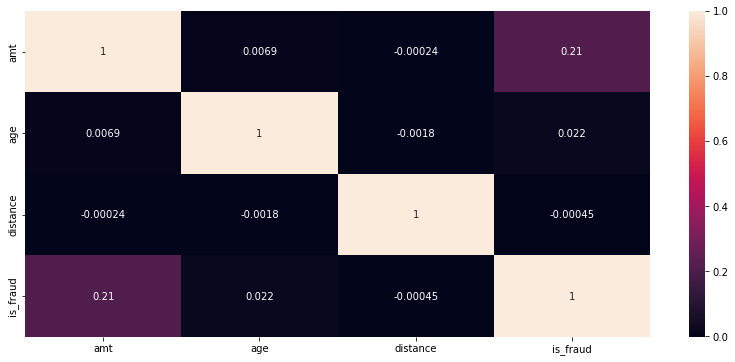

In [21]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
fig, ax = plt.subplots(figsize=(14,6)) 
sns.heatmap(df_correlation,annot=True, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

In [22]:
df_cont.drop(columns='is_fraud', inplace = True)

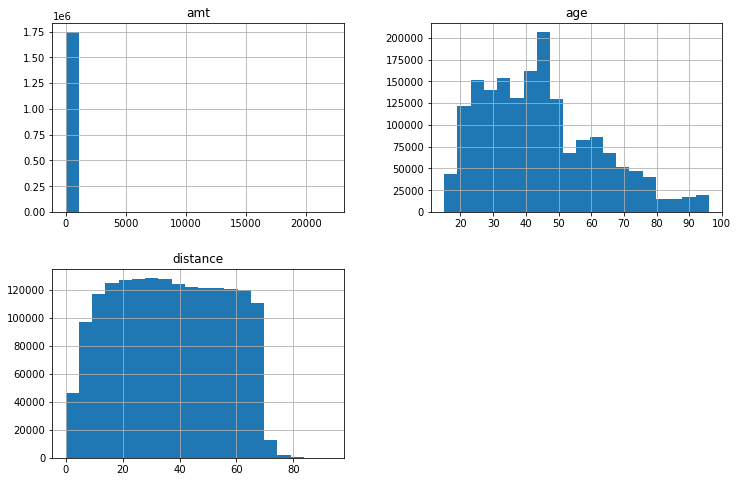

In [23]:
# Plotting the histograms for the continuous attributes in the dataset 
%matplotlib inline 

df_cont.hist(bins=20, figsize = (12,8))
plt.show()

In [24]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'area', 'age',
       'distance', 'year', 'month', 'day', 'is_weekend', 'hour'],
      dtype='object')

In [25]:
# Creating a dataframe with categorical attributes in the data table
df_categ = df[['gender','street', 'city', 'state','job','category','merchant','area','is_fraud']].copy()
df_categ.head()
#'ssn','trans_date','trans_time','year','month','day','is_weekend','hour'

,gender,street,city,state,job,category,merchant,area,is_fraud
0,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,"fraud_Jenkins, Hauck and Friesen",rural,1.0
1,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,"fraud_Zieme, Bode and Dooley",rural,1.0
2,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,fraud_Kling Inc,rural,1.0
3,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",grocery_pos,fraud_Miller-Hauck,rural,1.0
4,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",grocery_pos,fraud_McDermott-Weimann,rural,1.0


In [26]:
df_categ.head()

,gender,street,city,state,job,category,merchant,area,is_fraud
0,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,"fraud_Jenkins, Hauck and Friesen",rural,1.0
1,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,"fraud_Zieme, Bode and Dooley",rural,1.0
2,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",gas_transport,fraud_Kling Inc,rural,1.0
3,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",grocery_pos,fraud_Miller-Hauck,rural,1.0
4,F,482 Robert Light Apt. 994,Columbia Falls,ME,"Optician, dispensing",grocery_pos,fraud_McDermott-Weimann,rural,1.0


In [27]:
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752721 entries, 0 to 1752720
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   gender    object 
 1   street    object 
 2   city      object 
 3   state     object 
 4   job       object 
 5   category  object 
 6   merchant  object 
 7   area      object 
 8   is_fraud  float64
dtypes: float64(1), object(8)
memory usage: 120.3+ MB


In [28]:
data_types = pd.DataFrame(df_categ.dtypes,
                          columns=['Data Type'])

total_count = pd.DataFrame(df_categ.count(),
                                   columns=['Count'])

percentage_missing = pd.DataFrame(df_categ.isnull().sum()/len(df)*100,
                                   columns=['%Miss'])

cardinality = pd.DataFrame(columns=['Cardinality'])
for v in list(df_categ.columns.values):
    cardinality.loc[v] = [df_categ[v].nunique()]
    
mode = pd.DataFrame(columns=['Mode'])
for v in list(df_categ.columns.values):
    mode.loc[v] = [df_categ[v].value_counts().index.tolist()[0]]
    
mode_freq = pd.DataFrame(columns=['Mode Freq'])
for v in list(df_categ.columns.values):
    mode_freq.loc[v] = [df_categ[v].value_counts()[0]]

mode_perc = pd.DataFrame(columns=['Mode Perc'])
for v in list(df_categ.columns.values):
    mode_perc.loc[v] = [df_categ[v].value_counts()[0]/len(df_categ['gender'])*100]    
    
smode = pd.DataFrame(columns=['Second Mode'])
for v in list(df_categ.columns.values):
    smode.loc[v] = [df_categ[v].value_counts().index.tolist()[1]]
    
smode_freq = pd.DataFrame(columns=['Second Mode Freq'])
for v in list(df_categ.columns.values):
    smode_freq.loc[v] = [df_categ[v].value_counts()[1]]

smode_perc = pd.DataFrame(columns=['Second Mode Perc'])
for v in list(df_categ.columns.values):
    smode_perc.loc[v] = [df_categ[v].value_counts()[1]/len(df_categ['gender'])*100]  

In [29]:
data_quality_report2 = data_types.join(total_count).join(percentage_missing).join(cardinality).join(mode).join(mode_freq).join(mode_perc).join(smode).join(smode_freq).join(smode_perc)
print("\nData Quality Report - Categorical Features")
print("Total records: {}".format(len(data_quality_report2.index)))
data_quality_report2


Data Quality Report - Categorical Features
Total records: 9


,Data Type,Count,%Miss,Cardinality,Mode,Mode Freq,Mode Perc,Second Mode,Second Mode Freq,Second Mode Perc
gender,object,1752721,0.000000,2,M,896019,51.121599,F,856702,48.878401
street,object,1752721,0.000000,1000,527 Taylor Roads Suite 490,4391,0.250525,809 Burns Creek,4389,0.250411
city,object,1752721,0.000000,759,Houston,38807,2.214100,Brooklyn,18292,1.043634
state,object,1752721,0.000000,49,CA,224120,12.786975,TX,160401,9.151542
job,object,1752721,0.000000,499,Patent attorney,15365,0.876637,"Engineer, drilling",15335,0.874925
category,object,1751721,0.057054,14,shopping_pos,172013,9.814055,grocery_pos,165454,9.439837
merchant,object,1751721,0.057054,693,fraud_Kilback LLC,5902,0.336734,fraud_Kuhn LLC,5116,0.291889
area,object,1752721,0.000000,2,urban,1681675,95.946531,rural,71046,4.053469
is_fraud,float64,1751721,0.057054,2,0.0,1742411,99.411772,1.0,9310,0.531174


In [30]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merch_lat,merch_long,area,age,distance,year,month,day,is_weekend,hour
0,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,44.084527,-67.954129,rural,25,20.607,2021.0,4.0,29.0,3.0,0.0
1,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.584705,-67.692301,rural,25,24.325,2021.0,4.0,29.0,3.0,7.0
2,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.380492,-67.385962,rural,25,31.545,2021.0,4.0,29.0,3.0,10.0
3,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.350439,-67.644179,rural,25,19.370,2021.0,4.0,29.0,3.0,9.0
4,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.424536,-67.852445,rural,25,20.849,2021.0,4.0,29.0,3.0,0.0


<AxesSubplot:xlabel='long', ylabel='lat'>

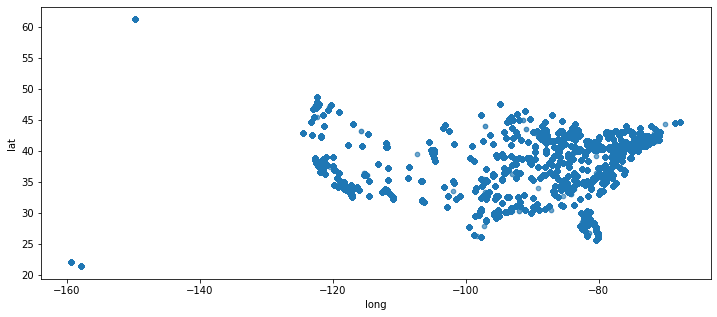

In [31]:
# Plotting the density areas of the coordinates provided in the dataset
df.plot(kind="scatter", x = "long", y = "lat",  figsize = (12,5), alpha = 0.1)

<AxesSubplot:xlabel='long', ylabel='lat'>

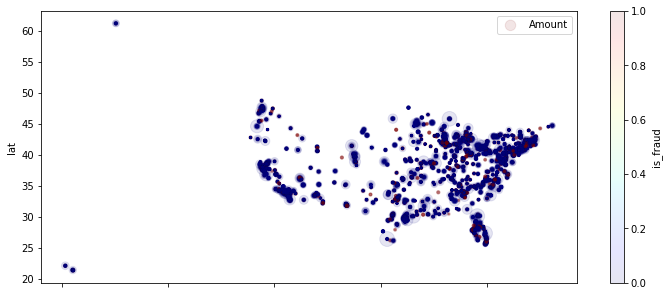

In [32]:
# Plotting the density areas of the coordinates provided in the dataset
df.plot(kind="scatter", x = "long", y = "lat",  figsize = (12,5), alpha = 0.1, s = df["amt"].astype('float')/100,
         label = "Amount", c = "is_fraud", colorbar = True, cmap = plt.get_cmap("jet"))

In [33]:
df1 = df.copy(deep=True)

## II. Data Preparation

### Data Cleaning

In [34]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

ssn: False
cc_num: False
first: False
last: False
gender: False
street: False
city: False
state: False
zip: False
lat: False
long: False
city_pop: False
job: False
dob: False
acct_num: False
profile: False
trans_num: True
trans_date: True
trans_time: True
unix_time: True
category: True
amt: True
is_fraud: True
merchant: True
merch_lat: True
merch_long: True
area: False
age: False
distance: True
year: True
month: True
day: True
is_weekend: True
hour: True


In [35]:
# Drop the instances have all null values present in the dataset
df.dropna(axis = 0, how='all', inplace = True)

# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

ssn: False
cc_num: False
first: False
last: False
gender: False
street: False
city: False
state: False
zip: False
lat: False
long: False
city_pop: False
job: False
dob: False
acct_num: False
profile: False
trans_num: True
trans_date: True
trans_time: True
unix_time: True
category: True
amt: True
is_fraud: True
merchant: True
merch_lat: True
merch_long: True
area: False
age: False
distance: True
year: True
month: True
day: True
is_weekend: True
hour: True


In [36]:
# Removing the entries where the target feature is not available as this is required for our modeling
df.dropna(axis = 0, how='any', inplace = True) # Considered for all instances having null values in either features

In [37]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

ssn: False
cc_num: False
first: False
last: False
gender: False
street: False
city: False
state: False
zip: False
lat: False
long: False
city_pop: False
job: False
dob: False
acct_num: False
profile: False
trans_num: False
trans_date: False
trans_time: False
unix_time: False
category: False
amt: False
is_fraud: False
merchant: False
merch_lat: False
merch_long: False
area: False
age: False
distance: False
year: False
month: False
day: False
is_weekend: False
hour: False


In [38]:
# Check for duplicates
df.duplicated().value_counts()

False    1751721
dtype: int64

- Here we see there are no duplicate instances in the dataset

### Data Transformation (Feature Engineering)

- The dataset consists of many categorical features. However, many of the machine learning models usually require numerical values as the input. Hence, necessary transformatin of data from categorical to numerical is must.In this section, we take multiple measures to convert data to make it suitable for modelling.

#### Customer Information 

1. ssn,ccnum, first, and last are identification numbers which do not add value to prediction and hence can be         droped.

2. The 'gender' feature has values Male and Female. It can be encoded

3. 'street', 'city', 'state',and 'zip' consists of too many values and is difficult to 1-hot encode.hence can be       dropped

4.  The dob (date of birth) column, by converting dob to age, can give us the information on target age group for       fraud. Hence, we will use this column.

5.  The long and lat value pairs is a representation of the city location and potential area for fraud.       Distance to the merchant is a metric of interest in this model, so lat and long are the better columns to use.


#### Transaction information

1. 'trans_date'and 'trans_time' features can be used to extract further information

2. 'amt' feature is very important. It can be normalised

3.  The merchant category is a categorical column that needs encoding.

4.  The merchant merch_long and merch_lat columns are needed for distance calculation.


#### We will be performing below transformations on the data

1. Dropping unnecessary columns of the dataset

2. 1-hot encoding for gender and category

3. Getting rural/urban from profile feature indicating where the fraud happened

4. Calculating distance between customer location and merchant location uisng latitud and longitude co-ordinates

5. Extract month, day, weekend, time from from trans_date, trans_time features

6. Calculating the age based on the dob

In [39]:
#Below are the different features in the dataset
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'area', 'age',
       'distance', 'year', 'month', 'day', 'is_weekend', 'hour'],
      dtype='object')

#### Data Selection: Dropping unnecessary columns from data frame

In [40]:
# Below are the columns which does not add any value to the modelling and hence we will drop it
df.drop(['ssn', 'cc_num', 'dob', 'first', 'last','street', 'city', 'state','zip','acct_num','job','trans_num','unix_time','merchant'], axis = 1, inplace = True)

In [41]:
# sample dataframe after dropping unnecessary columns
df.head()

,gender,lat,long,city_pop,profile,trans_date,trans_time,category,amt,is_fraud,merch_lat,merch_long,area,age,distance,year,month,day,is_weekend,hour
0,F,44.6699,-67.7534,1054,adults_2550_female_rural.json,2021-04-29,1900-01-01 00:07:35,gas_transport,6.73,1.0,44.084527,-67.954129,rural,25,20.607,2021.0,4.0,29.0,3.0,0.0
1,F,44.6699,-67.7534,1054,adults_2550_female_rural.json,2021-04-29,1900-01-01 07:10:46,gas_transport,12.74,1.0,45.584705,-67.692301,rural,25,24.325,2021.0,4.0,29.0,3.0,7.0
2,F,44.6699,-67.7534,1054,adults_2550_female_rural.json,2021-04-29,1900-01-01 10:09:12,gas_transport,9.53,1.0,45.380492,-67.385962,rural,25,31.545,2021.0,4.0,29.0,3.0,10.0
3,F,44.6699,-67.7534,1054,adults_2550_female_rural.json,2021-04-29,1900-01-01 09:15:39,grocery_pos,10.95,1.0,45.350439,-67.644179,rural,25,19.370,2021.0,4.0,29.0,3.0,9.0
4,F,44.6699,-67.7534,1054,adults_2550_female_rural.json,2021-04-29,1900-01-01 00:22:42,grocery_pos,353.18,1.0,45.424536,-67.852445,rural,25,20.849,2021.0,4.0,29.0,3.0,0.0


#### Data Attributes Decomposition/ Composition

In [42]:
# # 1. Getting the area( urban/rural) from profile
# df['area'] = df['profile'].str[-10 : -5]
# df.head()

In [43]:
# df.area.unique()

In [44]:
# dropping profile after extracting area from profile
df.drop(['profile'], axis = 1, inplace = True)

In [45]:
# # 2. Creating a new column with age calculated from the dob
# now = datetime.datetime.now()
# df['age'] = df1.dob.apply(lambda x: now.year - datetime.datetime.strptime(x,'%Y-%m-%d').year )

In [46]:
# # Printing the ages calculated
# df['age'].describe()

In [47]:
# # 3. Calculating distance between customer location and merchant location
# # pip install haversine
# lon1 = df["long"].astype(float)
# lat1 = df["lat"].astype(float)
# lon2 = df["merch_long"].astype(float)
# lat2 = df["merch_lat"].astype(float)

In [48]:
# def haversine_array(lon1, lat1, lon2, lat2):
#     lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

#     newlon = lon2 - lon1
#     newlat = lat2 - lat1

#     haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

#     dist = 2 * np.arcsin(np.sqrt(haver_formula ))
#     miles = round((3958 * dist),3) #6367 for distance in KM for miles use 3958
#     return miles

# df['distance'] = haversine_array(df['lat'], df['long'],df['merch_lat'], df['merch_long'])

In [49]:
# dropping the original columns after etxracting necessary information
df.drop(['lat', 'long','merch_lat','merch_long' ], axis = 1, inplace = True)

In [50]:
# # 4. Extracting date and time from trans_date, trans_time

# df['trans_date'] = pd.to_datetime(df['trans_date'])
# df['trans_time'] = pd.to_datetime(df['trans_time'],format='%H:%M:%S')
# #df['year'] = df['trans_date'].dt.year
# df['month'] = df['trans_date'].dt.month
# df['day'] = df['trans_date'].dt.day
# df['is_weekend'] = df['trans_date'].dt.day_of_week
# df['hour'] = df['trans_time'].dt.hour

In [51]:
df.drop(['trans_date', 'trans_time'],axis = 1, inplace = True) 
df.head()

,gender,city_pop,category,amt,is_fraud,area,age,distance,year,month,day,is_weekend,hour
0,F,1054,gas_transport,6.73,1.0,rural,25,20.607,2021.0,4.0,29.0,3.0,0.0
1,F,1054,gas_transport,12.74,1.0,rural,25,24.325,2021.0,4.0,29.0,3.0,7.0
2,F,1054,gas_transport,9.53,1.0,rural,25,31.545,2021.0,4.0,29.0,3.0,10.0
3,F,1054,grocery_pos,10.95,1.0,rural,25,19.370,2021.0,4.0,29.0,3.0,9.0
4,F,1054,grocery_pos,353.18,1.0,rural,25,20.849,2021.0,4.0,29.0,3.0,0.0


#### Transforming categorical fields

In [52]:
# one hot encoding of gender field
#cols_encode = ['gender', 'category']
df = pd.get_dummies(df, columns = ['gender', 'category', 'area'])
df.head()

,city_pop,amt,is_fraud,age,distance,year,month,day,is_weekend,hour,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,area_rural,area_urban
0,1054,6.73,1.0,25,20.607,2021.0,4.0,29.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1054,12.74,1.0,25,24.325,2021.0,4.0,29.0,3.0,7.0,...,0,0,0,0,0,0,0,0,1,0
2,1054,9.53,1.0,25,31.545,2021.0,4.0,29.0,3.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,1054,10.95,1.0,25,19.370,2021.0,4.0,29.0,3.0,9.0,...,0,0,0,0,0,0,0,0,1,0
4,1054,353.18,1.0,25,20.849,2021.0,4.0,29.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
#### sample dataframe after one hot encoding of gender and category variable
df.head()

,city_pop,amt,is_fraud,age,distance,year,month,day,is_weekend,hour,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,area_rural,area_urban
0,1054,6.73,1.0,25,20.607,2021.0,4.0,29.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1054,12.74,1.0,25,24.325,2021.0,4.0,29.0,3.0,7.0,...,0,0,0,0,0,0,0,0,1,0
2,1054,9.53,1.0,25,31.545,2021.0,4.0,29.0,3.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,1054,10.95,1.0,25,19.370,2021.0,4.0,29.0,3.0,9.0,...,0,0,0,0,0,0,0,0,1,0
4,1054,353.18,1.0,25,20.849,2021.0,4.0,29.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0


#### Data Scaling: Normalization

In [54]:
 ## We are doing range normalisation only for the fields which includes wide variety of values.
cols = ['age','city_pop','amt','distance', 'month', 'day', 'is_weekend', 'hour']
for col in cols:
    x = df[col].unique()
    print(f'Unique values in {col} column of dataframe are: {x}\n')

Unique values in age column of dataframe are: [25 30 36 48 43 49 28 42 27 34 33 46 37 44 38 40 29 35 41 39 47 32 31 45
 26 50 62 60 93 52 72 68 76 75 95 71 53 85 79 59 74 84 55 66 57 78 58 67
 86 63 54 61 65 56 64 51 83 89 94 69 73 70 77 91 82 87 81 80 92 96 90 21
 22 19 20 24 17 18 23 16 15]

Unique values in city_pop column of dataframe are: [1054 1362 2243 1398 1141 2263 2274 1565 15651 98692 23729 272940 59451
 28432 229807 5350 8716 3413 5769 16150 91661 2504700 459921 162646 19699
 194500 520197 900273 73374 16849 18910 26931 2817 2906700 5511 413574
 837792 14292 42656 478127 4755 116061 276002 2680484 8895 117295 54605
 74817 13574 162643 1526206 940359 123241 80708 38691 238602 790689 20270
 77103 75066 33307 26378 83241 13897 2383912 140482 248858 68733 112912
 24121 378909 10301 22455 91948 214112 27206 15652 209844 181438 9874
 39880 2576 5690 1737737 7496 19057 28996 9072 19403 101719 102011 1312922
 9937 59660 128354 5648 44485 817312 51984 21576 25173 5461 38806 41288
 6

In [55]:
# Range normalisation

cols = ['age','city_pop','amt','distance', 'day', 'is_weekend', 'hour']

# apply normalization techniques
for column in cols:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# view normalized data
df.head()

,city_pop,amt,is_fraud,age,distance,year,month,day,is_weekend,hour,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,area_rural,area_urban
0,0.000302,0.000260,1.0,0.123457,0.221505,2021.0,4.0,0.933333,0.5,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,0.000302,0.000532,1.0,0.123457,0.261499,2021.0,4.0,0.933333,0.5,0.304348,...,0,0,0,0,0,0,0,0,1,0
2,0.000302,0.000387,1.0,0.123457,0.339164,2021.0,4.0,0.933333,0.5,0.434783,...,0,0,0,0,0,0,0,0,1,0
3,0.000302,0.000451,1.0,0.123457,0.208199,2021.0,4.0,0.933333,0.5,0.391304,...,0,0,0,0,0,0,0,0,1,0
4,0.000302,0.015969,1.0,0.123457,0.224108,2021.0,4.0,0.933333,0.5,0.000000,...,0,0,0,0,0,0,0,0,1,0


#### Split data into Training and Testing

In [56]:
# assigning features to X and target to y

X = df[['city_pop', 'amt', 'is_fraud', 'age', 'gender_F', 'gender_M',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'area_rural', 'area_urban',
       'distance', 'month', 'day', 'is_weekend', 'hour']]

y = df.is_fraud

In [57]:
# splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=.80,shuffle = True, random_state= 42)

print(f'Training dataset : {xtrain.shape} {ytrain.shape}') # dimension of train set
print(f'Testing dataset : {xtest.shape}, {ytest.shape}') # dimension of test set

Training dataset : (1401376, 27) (1401376,)
Testing dataset : (350345, 27), (350345,)


## III. Modeling

In [58]:
df1

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merch_lat,merch_long,area,age,distance,year,month,day,is_weekend,hour
0,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,44.084527,-67.954129,rural,25,20.607,2021.0,4.0,29.0,3.0,0.0
1,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.584705,-67.692301,rural,25,24.325,2021.0,4.0,29.0,3.0,7.0
2,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.380492,-67.385962,rural,25,31.545,2021.0,4.0,29.0,3.0,10.0
3,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.350439,-67.644179,rural,25,19.370,2021.0,4.0,29.0,3.0,9.0
4,195-33-0728,3508835615951480,Ellen,Ortiz,F,482 Robert Light Apt. 994,Columbia Falls,ME,4623,44.6699,...,45.424536,-67.852445,rural,25,20.849,2021.0,4.0,29.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752716,104-11-6963,4605956343180739203,Nathan,Taylor,M,5337 Olson Garden Apt. 316,Camp Hill,PA,17011,40.2352,...,39.442387,-76.537321,urban,21,29.840,2021.0,9.0,11.0,5.0,12.0
1752717,104-11-6963,4605956343180739203,Nathan,Taylor,M,5337 Olson Garden Apt. 316,Camp Hill,PA,17011,40.2352,...,40.897036,-77.191863,urban,21,20.839,2021.0,3.0,9.0,1.0,15.0
1752718,104-11-6963,4605956343180739203,Nathan,Taylor,M,5337 Olson Garden Apt. 316,Camp Hill,PA,17011,40.2352,...,40.669692,-77.487229,urban,21,39.124,2021.0,12.0,11.0,5.0,22.0
1752719,104-11-6963,4605956343180739203,Nathan,Taylor,M,5337 Olson Garden Apt. 316,Camp Hill,PA,17011,40.2352,...,40.211420,-76.506579,urban,21,29.190,2021.0,4.0,10.0,5.0,13.0
